**Adding necessary libraries**

In [3]:
import pandas as pd
import seaborn as sns

**Loading the data**

In [4]:
df=pd.read_csv(r"/workspaces/Building-a-logistic-Regression-Model/data_regression.csv")
df.head(10)

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   
5  2015       101953  329-6603     NaN   31                     65   
6  2015       103051  416-1845     NaN   54                     59   
7  2015       103225  348-7193  Female   40                     50   
8  2015       103408  413-4039    Male   61                    205   
9  2015       103676  338-5207    Male   31                     63   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   
5           no              no               193.65                12.7   
6           no              no               239.25                10.2   
7           no              no               196.65                 5.6   
8           no             yes               263.70                 7.8   
9           no              no               316.80                12.3   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   
5               21.95                    111               6   
6               27.12                    106               4   
7               22.29                     88               9   
8               29.89                     64               5   
9               35.90                     58               2   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0  
5                    4.0                       4    1.0  
6                    NaN                       0    0.0  
7                    NaN                       5    1.0  
8                    3.0                       2    0.0  
9                    4.0                       0    0.0

**EXPLORATORY DATA ANALYSIS**

**Checking for the Data Types**

In [5]:
df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

**Checking for Null values**

In [6]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

**Total number of Missing Values**

In [7]:
df.isnull().any(axis=1).sum()

np.int64(82)

**Heatmap to show where the missing values are**

<Axes: >

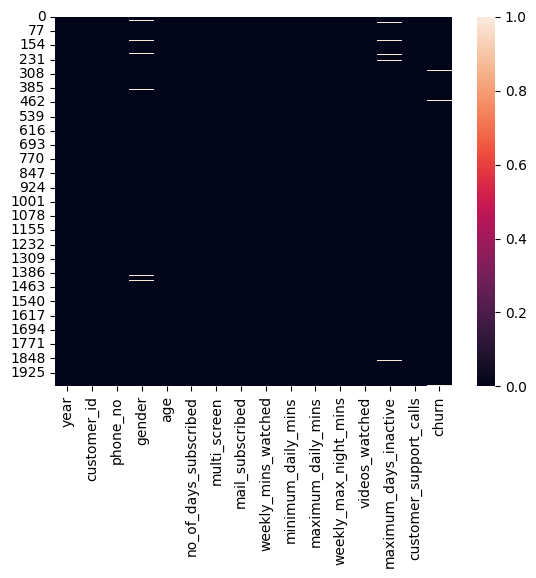

In [8]:
sns.heatmap(df.isnull())

**Dropping the Missing Values**

In [9]:
df=df.dropna()
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**Encoding Categorical Variables**

In [17]:
df.head(5)

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0

In [18]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df.mail_subscribed.unique()

array(['no', 'yes'], dtype=object)

In [20]:
df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [21]:
## Converting from Strings to numbers with sci-kit Learrn

def encode_categories(df,variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc=OrdinalEncoder()
    for v in variables:
        name= v+"_code"
        df[name]=ord_enc.fit_transform(df[[v]])
        print('The encoded values for '+v+' are:')
        df[name].unique()

In [22]:
encode_categories(df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
The encoded values for multi_screen are:
The encoded values for mail_subscribed are:


In [23]:
df

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0     2015       100198  409-8743  Female   36                     62   
1     2015       100643  340-5930  Female   39                    149   
2     2015       100756  372-3750  Female   65                    126   
3     2015       101595  331-4902  Female   24                    131   
4     2015       101653  351-8398  Female   40                    191   
...    ...          ...       ...     ...  ...                    ...   
1990  2015       993714  364-1969    Male   32                     61   
1991  2015       993815  387-5891    Male   49                     50   
1992  2015       994954  329-3222  Female   42                    119   
1996  2015       998086  383-9255    Male   45                    127   
1999  2015       999961  414-1496    Male   37                     73   

     multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0              no              no               148.35                12.2   
1              no              no               294.45                 7.7   
2              no              no                87.30                11.9   
3              no             yes               321.30                 9.5   
4              no              no               243.00                10.9   
...           ...             ...                  ...                 ...   
1990           no              no                67.50                 9.8   
1991          yes             yes               460.65                 8.0   
1992           no             yes               176.70                 7.6   
1996           no              no               273.45                 9.3   
1999           no              no               326.70                10.3   

      maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0                  16.81                     82               1   
1                  33.37                     87               3   
2                   9.89                     91               1   
3                  36.41                    102               4   
4                  27.54                     83               7   
...                  ...                    ...             ...   
1990                7.65                     94               6   
1991               52.21                    109               3   
1992               20.03                     76               3   
1996               30.99                    116               3   
1999               37.03                     89               6   

      maximum_days_inactive  customer_support_calls  churn  gender_code  \
0                       4.0                       1    0.0          0.0   
1                       3.0                       2    0.0          0.0   
2                       4.0                       5    1.0          0.0   
3                       3.0                       3    0.0          0.0   
4                       3.0                       1    0.0          0.0   
...                     ...                     ...    ...          ...   
1990                    3.0                       2    0.0          1.0   
1991                    3.0                       0    0.0          1.0   
1992                    3.0                       3    0.0          0.0   
1996                    3.0                       1    0.0          1.0   
1999                    3.0                       1    1.0          1.0   

      multi_screen_code  mail_subscribed_code  
0                   0.0                   0.0  
1                   0.0                   0.0  
2                   0.0                   0.0  
3                   0.0                   1.0  
4                   0.0                   0.0  
...                 ...                   ...  
1990                0.0                   0.0  
1991                1.0                   1.0  
1992                0.0                   1.0  
1996  

**Data  Visualizations**

In [24]:
def plot_scatterplots(df, cols_to_exclude,class_col):
    
    #This function returns scatterplots of all the variables in the dataset
    # against the classification variable, for a quick data visualization.
    
    import numpy as np
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore")
    cols=df.select_dtypes(include=np.number).columns.tolist() #Finding all the numerical columns from the dataframe
    X=df[cols] #Creating a dataframe only with the numerical columns
    X=X[X.columns.difference(cols_to_exclude)] #Columns to exclude
    for col in X.columns.difference([class_col]):
        g=sns.FacetGrid(df)
        g.map(sns.scatterplot, col, class_col)

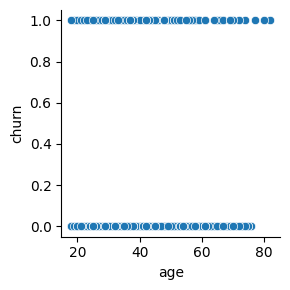

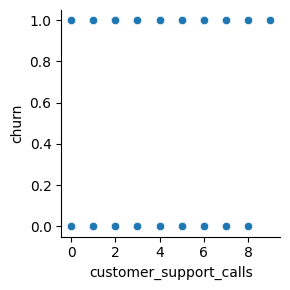

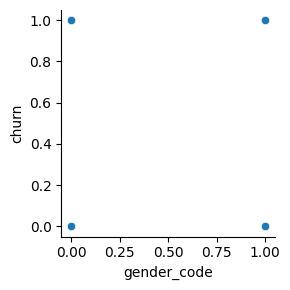

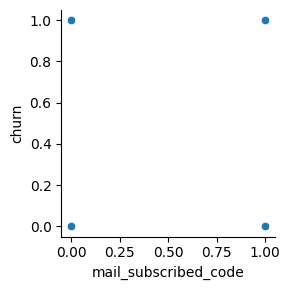

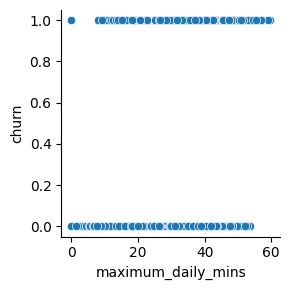

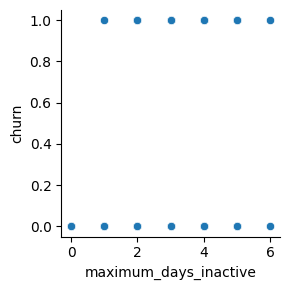

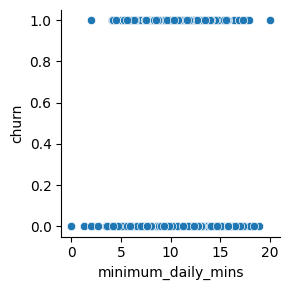

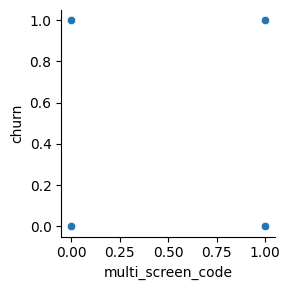

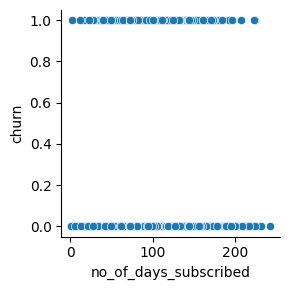

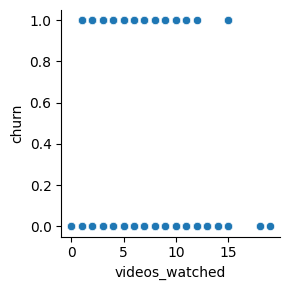

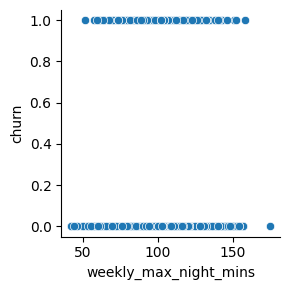

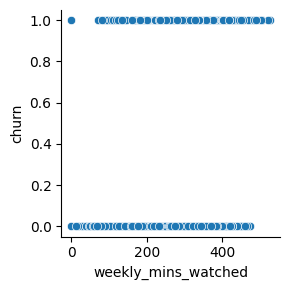

In [25]:
plot_scatterplots(df,['customer_id','phone_no','year'],'churn')

In [26]:
def full_diagnostic(df, class_col, cols_to_exclude):
    import numpy as np
    import seaborn as sns
    cols=df.select_dtypes(include=np.number).columns.tolist() #Finding all the numerical columns from the dataframe
    X=df[cols] #Creating a dataframe only with the numerical columns
    X=X[X.columns.difference(cols_to_exclude)] #Columns to exclude
    X=X[X.columns.difference([class_col])]
    sns.pairplot(df, hue=class_col)

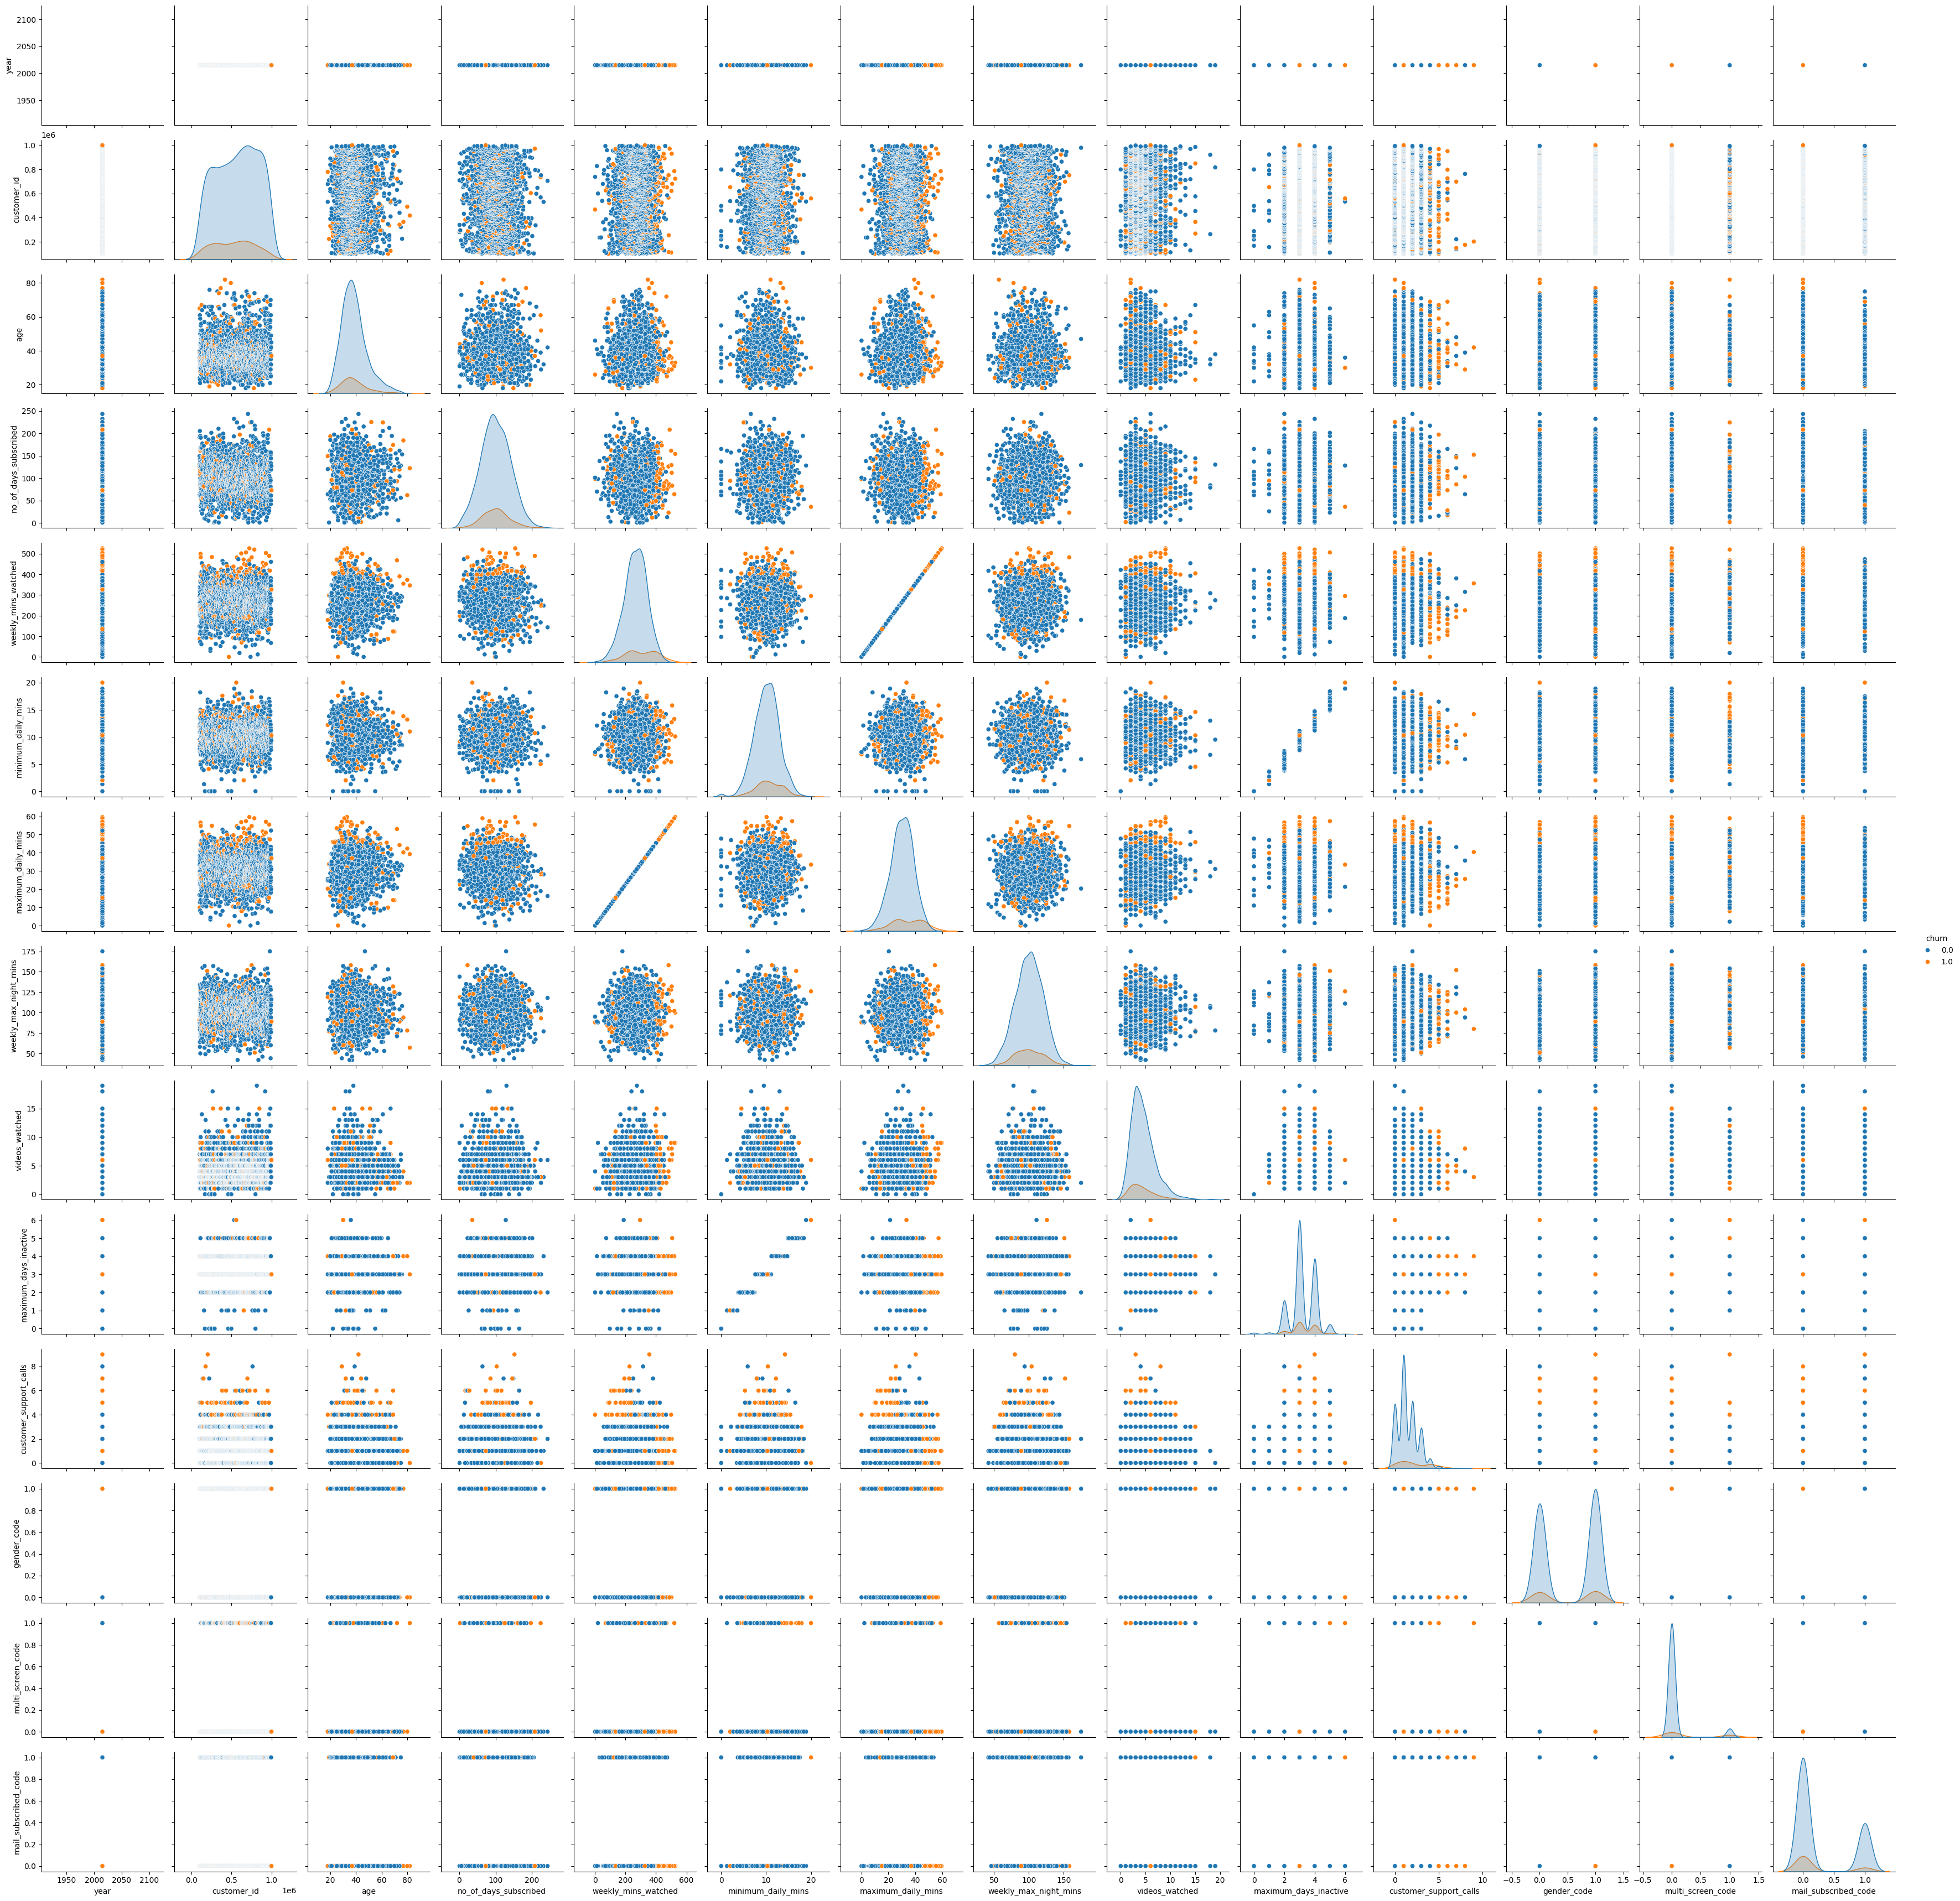

In [27]:
full_diagnostic(df, class_col='churn', cols_to_exclude=['customer_id','year','phone_no'])

**Running the Logistic Model with the StatsModel Library**

In [33]:
def  logistic_regression(df, class_col, cols_to_exclude):
    import statsmodels.api as sm
    import numpy as np
    cols=df.select_dtypes(include=np.number).columns.tolist()
    X=df[cols]
    X=X[X.columns.difference([class_col])]
    X=X[X.columns.difference(cols_to_exclude)]
    
    ## Scaling Variables
    ## from sklearn import preprocessing
    ## scaler =preprocessing.StandardScaler.fit(x)
    ## X-scaled= scaler.transform(x)
    
    ## X-scaled= scaler.transform(x)
    y=df[class_col]
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print(result.summary2())

In [34]:
logistic_regression(df, class_col='churn', cols_to_exclude=['phone_no','customer_id','year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   churn              Pseudo R-squared:   0.137     
Date:                 2024-07-22 10:37   AIC:                1315.1404 
No. Observations:     1918               BIC:                1381.8488 
Df Model:             11                 Log-Likelihood:     -645.57   
Df Residuals:         1906               LL-Null:            -748.02   
Converged:            1.0000             LLR p-value:        7.1751e-38
No. Iterations:       7.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [35]:
## Calculating the exponential
import math
math.exp(-0.0208)

0.9794148279480585

**Running the Model**

In [36]:
def  prepare_model(df, cols_to_exclude, class_col):
    # Split in trainig and test set
    from sklearn.model_selection import train_test_split
    import numpy as np
    # Selecting only the numerical columns and excluding the columns we specifiedd in the function
    cols=df.select_dtypes(include=np.number).columns.tolist()
    X=df[cols]
    X=X[X.columns.difference([class_col])]
    X=X[X.columns.difference(cols_to_exclude)]
    # Selecting as a column
    y=df[class_col]
    global X_train, X_test, y_train, y_test #This allows us to ccaall these variables outside these function
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
def run_model(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    global logreg #Defines the Logistic model as a global model that can be used outside of this function
    #Fitting the Logistic Regression
    logreg=LogisticRegression(random_state=13)
    logreg.fit(X_train,y_train)
    #Predicting y values
    global y_pred #Defines Y_pred as a global  variable that can be used outside of this function
    y_pred=logreg.predict(X_test)
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f" % logit_roc_auc)

In [38]:
prepare_model(df, class_col='churn', cols_to_exclude=['customer_id','year', 'phone_no'])

In [39]:
X_train

age  customer_support_calls  gender_code  mail_subscribed_code  \
533    32                       3          1.0                   0.0   
796    25                       4          0.0                   0.0   
1180   46                       1          1.0                   0.0   
506    20                       2          1.0                   0.0   
77     43                       1          0.0                   0.0   
...   ...                     ...          ...                   ...   
897    42                       1          0.0                   0.0   
1281   37                       0          1.0                   0.0   
1723   38                       0          1.0                   1.0   
613    37                       2          1.0                   0.0   
741    31                       1          1.0                   0.0   

      maximum_daily_mins  maximum_days_inactive  minimum_daily_mins  \
533                34.41                    3.0                10.2   
796                34.05                    2.0                 7.1   
1180               28.44                    3.0                11.0   
506                16.46                    3.0                10.9   
77                 21.30                    3.0                 8.4   
...                  ...                    ...                 ...   
897                27.80                    4.0                12.6   
1281               38.23                    3.0                10.3   
1723               18.31                    3.0                 8.9   
613                22.83                    4.0                12.6   
741                29.27                    3.0                 8.7   

      multi_screen_code  no_of_days_subscribed  videos_watched  \
533                 0.0                     36               2   
796                 0.0                     82               1   
1180                1.0                     87               6   
506                 0.0                    193               5   
77                  0.0                    140               4   
...                 ...                    ...             ...   
897                 0.0                     94               5   
1281                0.0                    111               3   
1723                0.0                    103               3   
613                 0.0                     25               5   
741                 0.0                    123               4   

      weekly_max_night_mins  weekly_mins_watched  
533                     127               303.60  
796                      60               300.45  
1180                     88               250.95  
506                     115               145.20  
77                       94               187.95  
...                     ...                  ...  
897                      82               245.25  
1281                     97               337.35  
1723                     98               161.55  
613                     100               201.45  
741                     101               258.30  

[1342 rows x 12 columns]

In [40]:
run_model(X_train,X_test, y_train, y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.44      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.67      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


In [41]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    tn,fp,fn,tp= confusion_matrix.ravel()
    print('TN:%0.2f'%tn)
    print('TP:%0.2f'%tp)
    print('FP:%0.2f'%fp)
    print('FN:%0.2f'%fn)

In [42]:
def roc_curve(logreg, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
    fpr, tpr, thresholds=roc_curve(y_test, logreg.predict(X_test))
    
    # Setting the graph area
    plt.figure()
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    
    #Plotting thhe worst line possible
    plt.plot([0, 1],[0,1],'b--')
    
    #Plotting the logistic Regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    
    #Adding labels etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='Lower right')
    plt.savefig('Log_ROC')
    plt.show() 

In [43]:
prepare_model(df,class_col='churn', cols_to_exclude=['year','phone_no','customer_id'])

In [44]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
# Example:
# y_test = [0, 1, 0, 1, 0, 1]  # True labels
# y_pred = [0, 1, 0, 0, 1, 1]  # Predicted labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Unpacking the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Print the values
print(f'TN: {tn}')
print(f'TP: {tp}')
print(f'FP: {fp}')
print(f'FN: {fn}')

Confusion Matrix:
[[503  10]
 [ 55   8]]
TN: 503
TP: 8
FP: 10
FN: 55


In [45]:
confusion_matrix(y_test, y_pred)

array([[503,  10],
       [ 55,   8]])

ValueError: 'Lower right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

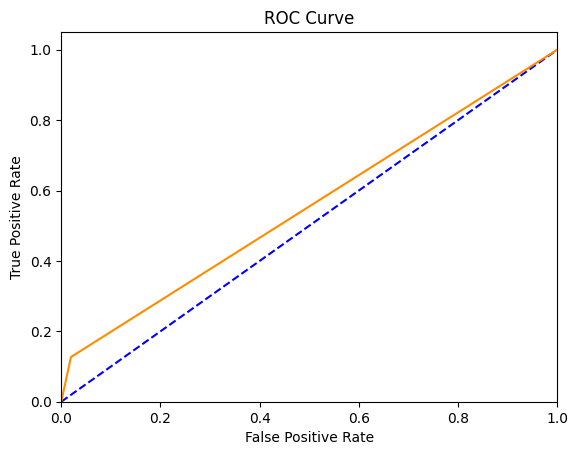

In [46]:
roc_curve(logreg, X_test, y_test)

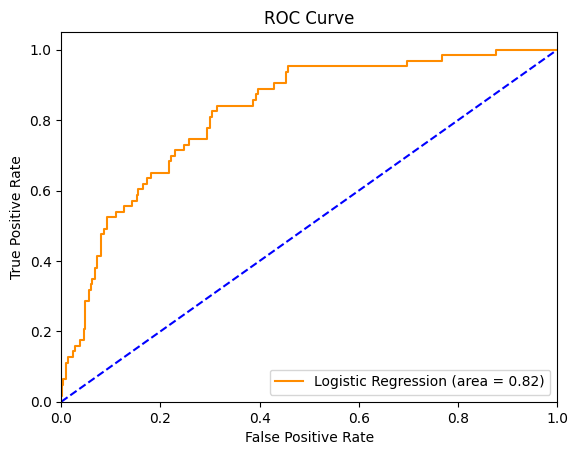

In [47]:
def roc_curve(logreg, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score, roc_curve
    
    # Calculate ROC AUC score
    y_score = logreg.predict_proba(X_test)[:, 1]  # Get predicted probabilities
    logit_roc_auc = roc_auc_score(y_test, y_score)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    # Setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Plotting the worst line possible
    plt.plot([0, 1], [0, 1], 'b--')
    
    # Plotting the Logistic Regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    
    # Adding labels etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')  # Correct location
    
    # Saving and showing the plot
    plt.savefig('Log_ROC')
    plt.show() 

# Example usage
roc_curve(logreg, X_test, y_test)


**Dealing with Class imbalance**

In [48]:
df["churn"].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [49]:
def run_model_bweights(X_train, X_test, y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    global logreg
    logreg=LogisticRegression(random_state=13, class_weight="balanced")
    logreg.fit(X_train, y_train)
    global y_pred
    y_pred=logreg.predict(X_test)
    logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is:%0.2f"%logit_roc_auc)

In [50]:
run_model_bweights(X_train, X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is:0.76


In [51]:
def run_model_aweights(X_train, X_test, y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, classification_report
    global logreg
    logreg=LogisticRegression(random_state=13, class_weight=w)
    logreg.fit(X_train, y_train)
    global y_pred
    y_pred=logreg.predict(X_test)
    logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is:%0.2f"%logit_roc_auc)

In [52]:
run_model_aweights(X_train,X_test,y_train, y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is:0.51


In [53]:
def adjust_imbalance(X_train,y_train,class_col):
    from sklearn.utils import resample
    import pandas as pd
    X=pd.concat([X_train, y_train], axis=1)
    
    #Separate 2 classses
    class0=X[X[class_col]==0]
    class1=X[X[class_col]==1]
    
    #Case 1- Bootstraps from the minority class
    if len(class1)<len(class0):
        resampled=resample(class1,
                          replace=True,
                          n_samples=len(class0),
                          random_state=10)
        resampled_df=pd.concat([resampled, class0])
        
    #Case 1- Resamples from the majority class
    else:
        resampled=resample(class1,
                          replace=False,
                          n_samples=len(class0),
                          random_state=10)
        resampled_df=pd.concat([resampled,class0])
        
    return resampled_df

In [54]:
resampled_df = adjust_imbalance(X_train,y_train,class_col="churn")

In [55]:
prepare_model(resampled_df, class_col="churn", cols_to_exclude=["customer_id","phone_no","year"])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       339
         1.0       0.73      0.65      0.69       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


In [56]:
def prepare_model_smote(df,class_col,cols_to_exclude):
    #Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import SMOTE
    cols=df.select_dtypes(include=np.number).columns.tolist()
    X=df[cols]
    X=X[X.columns.difference([class_col])]
    X=X[X.columns.difference(cols_to_exclude)]
    y=df[class_col]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=0, sampling_strategy='auto')
    X_train, y_train=sm.fit_resample(X_train, y_train)

In [59]:
prepare_model_smote(df, class_col="churn", cols_to_exclude=["customer_id","phone_no","year"])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.26      0.71      0.38        63

    accuracy                           0.75       576
   macro avg       0.61      0.73      0.61       576
weighted avg       0.88      0.75      0.79       576

The area under the curve is: 0.73


**Feature Selection**

In [60]:
class_col="churn"
cols_to_exclude=["customer_id","phone_no","year"]

def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
    from sklearn.feature_selection import VarianceThreshold
    import numpy as np
    from sklearn import preprocessing
    
    #Finding all the numerical columns from a dataframe
    cols=df.select_dtypes(include=np.number).columns.tolist()
    #Creating a dataframe only with the numerical columns
    X=df[cols]
    X=X[X.columns.difference([class_col])]
    #Columns to exclude
    X=X[X.columns.difference(cols_to_exclude)]
    #Scaling variables
    scaler=preprocessing.StandardScaler().fit(X)
    X_scaled=scaler.transform(X)
    #Removing both costant and quasi-constant
    var_thr= VarianceThreshold(threshold=threshold)
    var_thr.fit(X_scaled)
    var_thr.get_support()
    
    global selected_cols
    selected_cols=X.columns[var_thr.get_support()]
    
    print("Thee selected features are:")
    print(list(selected_cols))

In [61]:
var_threshold_selection(df,cols_to_exclude=["customer_id","phone_no","year"], class_col="churn", threshold=1)

Thee selected features are:
['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']


In [62]:
prepare_model(resampled_df,class_col="churn", cols_to_exclude=["customer_id","phone_no","year","gender","age",
                                                              "no_of_days_subscribed","multi_screen","mail_subscribed",
                                                              "minimum_daily_mins","weekly_max_night_mins","videos_watched",
                                                              "customer_support_calls","churn","gender_code",
                                                               "multi_screen_code","mail_subscribed_code"])

run_model(X_train, X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


In [63]:
def rfe_selection(df, cols_to_exclude, class_col, model):
    import warnings
    warnings.filterwarnings("ignore")
    import numpy as np
    from sklearn.feature_selection import RFE
    #Finding all the numerical columns from a dataframe
    cols=df.select_dtypes(include=np.number).columns.tolist()
    #Creating a dataframe only with the numerical columns
    X=df[cols]
    X=X[X.columns.difference([class_col])]
    #Columns to exclude
    X=X[X.columns.difference(cols_to_exclude)]
    y=df[class_col]
    
    rfe=RFE(model)
    rfe=rfe.fit(X,y)
    global selected_cols
    selected_cols=X.columns[rfe.support_]
    
    print("The selected features are:")
    print(list(selected_cols))

In [64]:
rfe_selection(df, class_col="churn",cols_to_exclude=["phone_no","customer_id","year"], model=logreg)

The selected features are:
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [65]:
prepare_model(resampled_df,class_col="churn",cols_to_exclude=["customer_id","phone_no","year","gender","age",
                                                             "no_of_days_subscribed","multi_screen","mail_subscribed",
                                                               "weekly_max_night_mins",
                                                              "gender_code",
                                                               "multi_screen_code","mail_subscribed_code"])

run_model(X_train, X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       339
         1.0       0.71      0.69      0.70       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


**Saving and Loading the model**

In [66]:
import pickle
pickle.dump(logreg, open("model1.pkl","wb"))

In [67]:
model=pickle.load(open("model1.pkl","rb"))

In [68]:
model.predict(X_test)

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.